In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
df_1 = pd.read_csv('./Datasets/train.csv')

In [3]:
df_1.shape

(404290, 6)

In [5]:
df = df_1.sample(100000,random_state=2)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100000 entries, 398782 to 165218
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            100000 non-null  int64 
 1   qid1          100000 non-null  int64 
 2   qid2          100000 non-null  int64 
 3   question1     100000 non-null  object
 4   question2     99999 non-null   object
 5   is_duplicate  100000 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 5.3+ MB


### We have missing value in question1(1 value) and question2(2 value).
#### As the missing-count is very low. We will remove them Rows 

In [7]:
# Checking if any value is null in our dataset
df[df.isnull().any(1)]

,id,qid1,qid2,question1,question2,is_duplicate
201841,201841,303951,174364,How can I create an Android app?,NaN,0


In [8]:
df.dropna(inplace=True)

In [9]:
# Droping Null Value
df[df.isnull().any(1)] 

,id,qid1,qid2,question1,question2,is_duplicate


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 398782 to 165218
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            99999 non-null  int64 
 1   qid1          99999 non-null  int64 
 2   qid2          99999 non-null  int64 
 3   question1     99999 non-null  object
 4   question2     99999 non-null  object
 5   is_duplicate  99999 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 5.3+ MB


<AxesSubplot:xlabel='is_duplicate'>

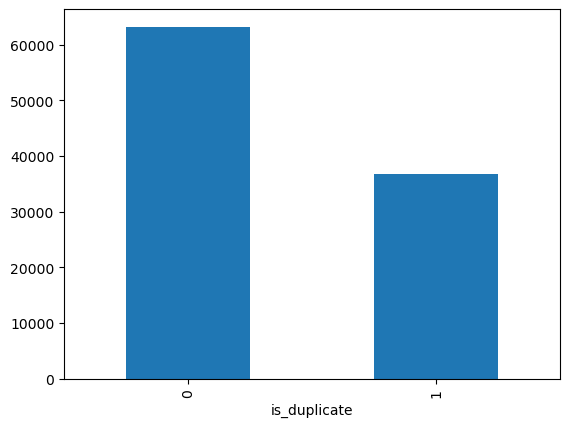

In [11]:
df.groupby("is_duplicate")['id'].count().plot.bar()

### Unique questions in the dataaset

In [12]:
unique=len(set(list(df['qid1'])+list(df['qid2'])))
print ('Total number of  Unique Questions are: {}\n'.format(unique))

Total number of  Unique Questions are: 165974



### Percentage of not-Similar and Similar question

In [13]:
print('Question pairs are not Similar (is_duplicate = 0):\n     {}%'.format(100 - round(df['is_duplicate'].mean()*100, 2)))
print('Question pairs are Similar (is_duplicate = 1):\n     {}%'.format(round(df['is_duplicate'].mean()*100, 2)))

Question pairs are not Similar (is_duplicate = 0):
     63.21%
Question pairs are Similar (is_duplicate = 1):
     36.79%


### Some Exploratory DataAnalysis

In [14]:
# Creating a dataframe that contains the question id of both quid1 and quid2
qids1 = list(df['qid1']) + list(df['qid2'])
qids = pd.Series(list(df['qid1']) + list(df['qid2']))
unique_qs = len(np.unique(qids))

# Counts any question that have been repeated more than one time
qs_morethan_onetime = np.sum(qids.value_counts() > 1)

print ('Total number of Questions are: {}\n'.format(len(qids1)))
print ('Total number of  Unique Questions are: {}\n'.format(unique_qs))
print ('Number of unique questions that appear more than one time: {}\n'.format(qs_morethan_onetime))


Total number of Questions are: 199998

Total number of  Unique Questions are: 165974

Number of unique questions that appear more than one time: 19488



In [15]:
# Taking the frequency of all question and printing the max of them
print ('Max number of times a single question is repeated: {}\n'.format(max(qids.value_counts())))

q_vals=qids.value_counts()
print(q_vals)

Max number of times a single question is repeated: 32

4044      32
2559      32
2561      21
19621     19
17978     19
          ..
527169     1
323174     1
196329     1
110956     1
256601     1
Length: 165974, dtype: int64


### Questions asked most frequently.

In [16]:

print(df.loc[df['qid1']==2559]['question1'].head(1).values)
print('\n')
print(df.loc[df['qid1']==30182]['question1'].head(1).values)
print('\n')
print(df.loc[df['qid1']==4044]['question1'].head(1).values)
print('\n')
print(df.loc[df['qid1']==2561]['question1'].head(1).values)
print('\n')
print(df.loc[df['qid1']==14376]['question1'].head(1).values)

['What are the best ways to lose weight?']


['How is borderline personality disorder (BPD) treated?']


['How can I lose weight quickly?']


["What's the easiest way to make money online?"]


['Can you see who views your Instagram?']


In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

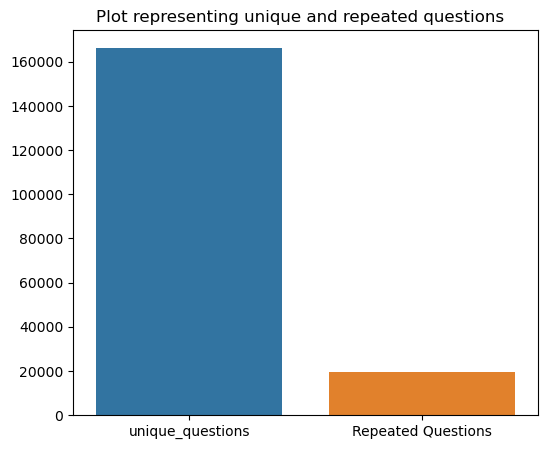

In [18]:
x = ["unique_questions" , "Repeated Questions"]
y =  [unique_qs , qs_morethan_onetime]

plt.figure(figsize=(6, 5))
plt.title ("Plot representing unique and repeated questions  ")
sns.barplot(x,y)
plt.show()

### checking whether there are any repeated pair of questions

In [19]:
duplicateRowsDF = df[df.duplicated(['qid1','qid2'])] 

In [20]:
print ("Number of duplicate questions : ",duplicateRowsDF.shape[0])

Number of duplicate questions :  0


In [21]:
df

,id,qid1,qid2,question1,question2,is_duplicate
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0
...,...,...,...,...,...,...
147622,147622,185363,232946,Why do you live a life?,Why do people live? What is reason for you to ...,1
353951,353951,23995,483033,Why are Golden Retriever dogs with blue eyes s...,How do I train Golden Retriever dogs with blue...,0
251765,251765,177088,357433,How do I learn computer practically?,What is the best way to learn computer languages?,0
150383,150383,221786,236690,I want to start a new business in India (appro...,What are some good ideas for small industries ...,0


### Basic Feature-Extraction

In [22]:
# Finding length of Question 1
df['Q1_Len'] = df['question1'].str.len()

# Finding length of Question 2
df['Q2_Len'] = df['question2'].str.len()

In [23]:
# Finding Number of Words in Question 1
df['Q1_Words']=df['question1'].apply(lambda row : len(row.split(" ")))

# Finding Number of Words in Question 2
df['Q2_Words']=df['question2'].apply(lambda row : len(row.split(" ")))

### Number of Common Words

In [24]:
def common(row):
    return len((set(row['question1'].lower().split())).intersection(set(row['question2'].lower().split())))

In [25]:
df['common_Word'] = df.apply(common, axis=1)

### Getting total number of (unique) words in both question1 and question2

In [26]:
def total(row):
    
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [27]:
df['word_Total'] = df.apply(total, axis=1)

### Finding the number of common words between question1 and question2 and dividing by total words between both of them

In [28]:
def word_share(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return 1.0 * len(w1 & w2)/(len(w1) + len(w2))

In [29]:
df['Shared_Word'] = df.apply(word_share, axis=1)

In [30]:
# Saving our dataframe as csv file
df.to_csv("With_Basic_Feature.csv", index=False)

In [31]:
df_basicFeature = pd.read_csv('stepWise_CSV/With_Basic_Feature.csv')

In [27]:
df_basicFeature.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404287 entries, 0 to 404286
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            404287 non-null  int64  
 1   qid1          404287 non-null  int64  
 2   qid2          404287 non-null  int64  
 3   question1     404287 non-null  object 
 4   question2     404287 non-null  object 
 5   is_duplicate  404287 non-null  int64  
 6   Q1_Len        404287 non-null  int64  
 7   Q2_Len        404287 non-null  int64  
 8   Q1_Words      404287 non-null  int64  
 9   Q2_Words      404287 non-null  int64  
 10  common_Word   404287 non-null  int64  
 11  word_Total    404287 non-null  int64  
 12  Shared_Word   404287 non-null  float64
dtypes: float64(1), int64(10), object(2)
memory usage: 40.1+ MB


In [ ]:
#df = df_basicFeature

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404287 entries, 0 to 404289
Data columns (total 13 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            404287 non-null  int64  
 1   qid1          404287 non-null  int64  
 2   qid2          404287 non-null  int64  
 3   question1     404287 non-null  object 
 4   question2     404287 non-null  object 
 5   is_duplicate  404287 non-null  int64  
 6   Q1_Len        404287 non-null  int64  
 7   Q2_Len        404287 non-null  int64  
 8   Q1_Words      404287 non-null  int64  
 9   Q2_Words      404287 non-null  int64  
 10  common_Word   404287 non-null  int64  
 11  word_Total    404287 non-null  int64  
 12  Shared_Word   404287 non-null  float64
dtypes: float64(1), int64(10), object(2)
memory usage: 43.2+ MB


### More insight to dataset, with help of Basic _Extracted_Features

In [32]:
print ("Minimum length of the questions in question1 : " , min(df['Q1_Words']))
print ("Minimum length of the questions in question2 : " , min(df['Q2_Words']))

print ("Number of Questions with minimum length [question1] :", df[df['Q1_Words']== 1].shape[0])
print ("Number of Questions with minimum length [question2] :", df[df['Q2_Words']== 1].shape[0])

print ("Maximum length of the questions in question1 : " , max(df['Q1_Words']))
print ("Maximum length of the questions in question2 : " , max(df['Q2_Words']))

print ("Number of Questions with minimum length [question1] :", df[df['Q1_Words']>120].shape[0])
print ("Number of Questions with minimum length [question2] :", df[df['Q2_Words']> 230].shape[0])

print ("Maximum number of Common word : " , max(df['common_Word']))
print ("Maximum number of Shared Word : " , max(df['Shared_Word']))

Minimum length of the questions in question1 :  1
Minimum length of the questions in question2 :  1
Number of Questions with minimum length [question1] : 12
Number of Questions with minimum length [question2] : 4
Maximum length of the questions in question1 :  72
Maximum length of the questions in question2 :  237
Number of Questions with minimum length [question1] : 0
Number of Questions with minimum length [question2] : 4
Maximum number of Common word :  41
Maximum number of Shared Word :  0.5


### Analyzing Shared_Word feature

/home/cdac/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/cdac/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


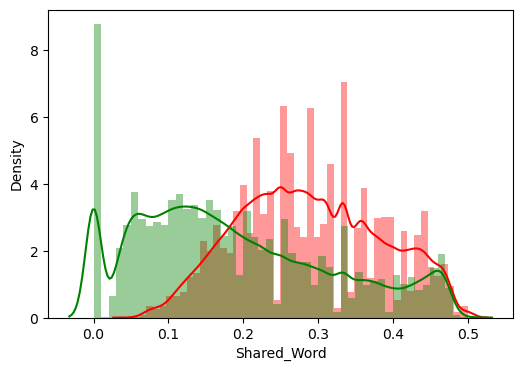

In [43]:
plt.figure(figsize=(6, 4))

#plt.subplot(1,2,1)
#sns.violinplot(x = 'is_duplicate', y = 'Shared_Word', data = df[0:])

#plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['Shared_Word'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['Shared_Word'][0:] , label = "0" , color = 'green' )
plt.show()

### Shared_Word will be a useful feature!! according to above graph.

### Analyzing 'common_Word' feature

/home/cdac/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/cdac/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


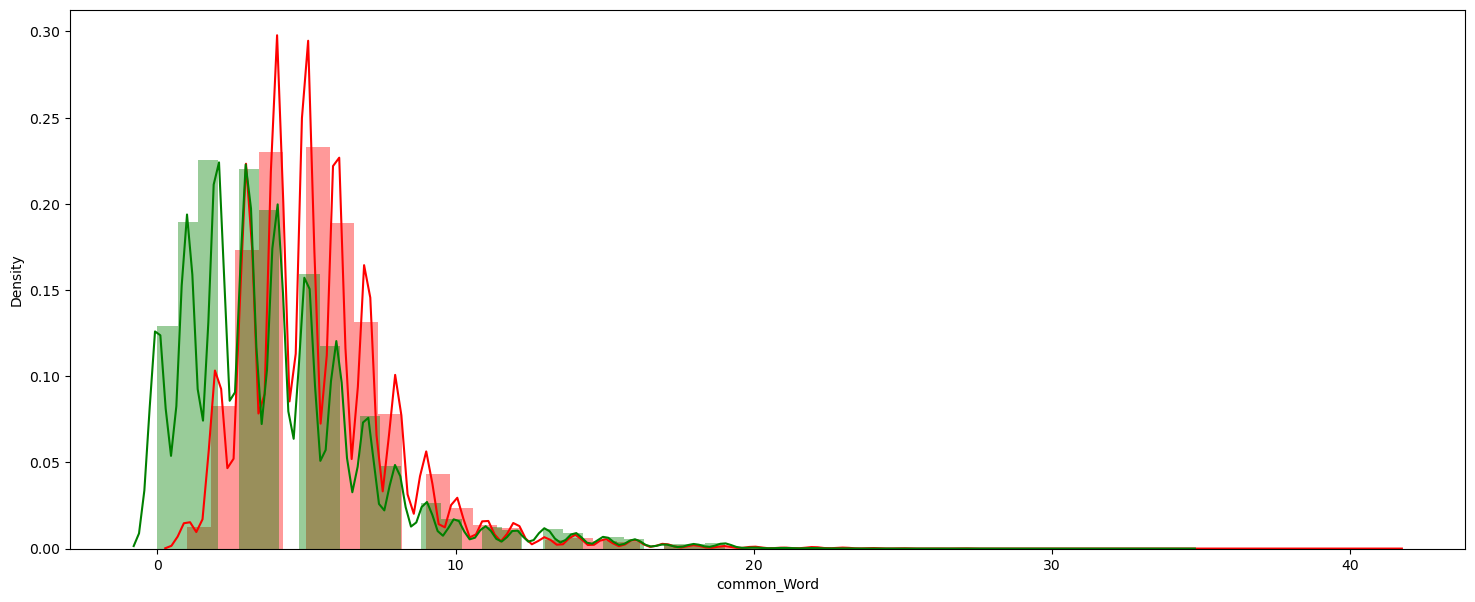

In [45]:
plt.figure(figsize=(18, 7))

#plt.subplot(1,2,1)
#sns.violinplot(x = 'is_duplicate', y = 'common_Word', data = df[0:])

#plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['common_Word'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['common_Word'][0:] , label = "0" , color = 'green' )
plt.show()

### common_Word will be a useful feature!!, according to above graph.

/home/cdac/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/cdac/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


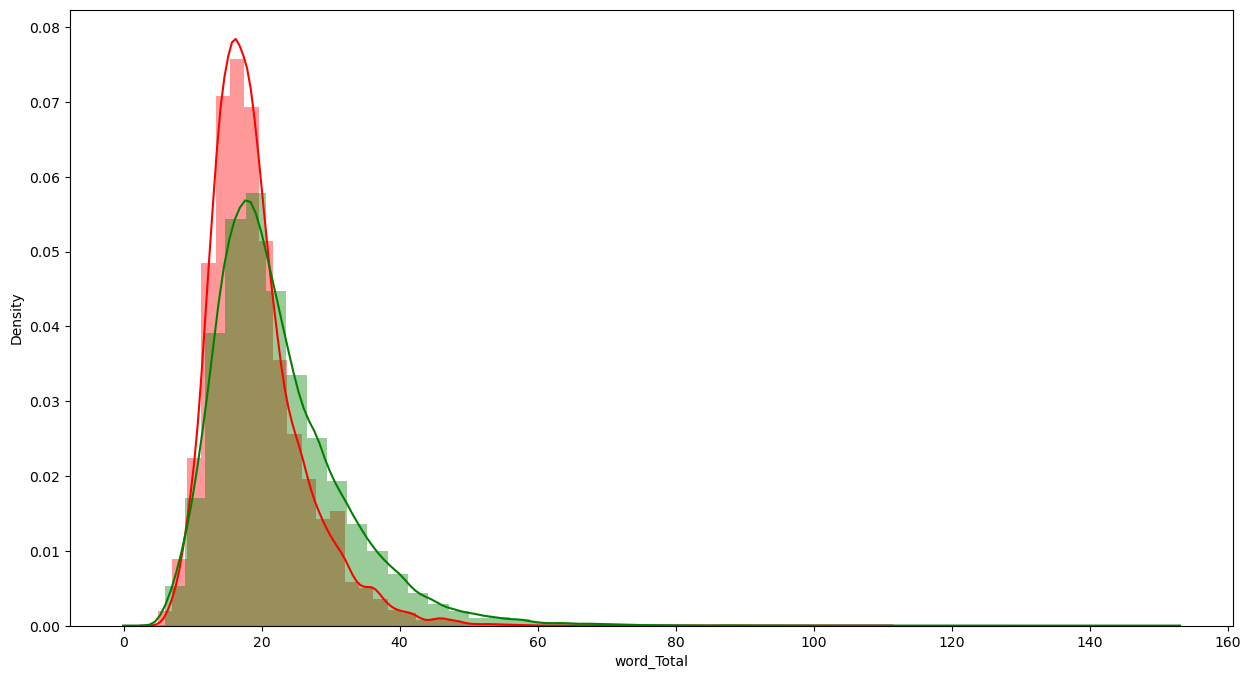

In [37]:
plt.figure(figsize=(15, 8))

#plt.subplot(1,2,1)
#sns.violinplot(x = 'is_duplicate', y = 'word_Total', data = df[0:])

#plt.subplot(1,2,2)
sns.distplot(df[df['is_duplicate'] == 1.0]['word_Total'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['word_Total'][0:] , label = "0" , color = 'green' )
plt.show()

### WordTotal does not seems to be of much usefull can be dropped.

In [33]:
df.drop(columns='word_Total',inplace=True)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 398782 to 165218
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            99999 non-null  int64  
 1   qid1          99999 non-null  int64  
 2   qid2          99999 non-null  int64  
 3   question1     99999 non-null  object 
 4   question2     99999 non-null  object 
 5   is_duplicate  99999 non-null  int64  
 6   Q1_Len        99999 non-null  int64  
 7   Q2_Len        99999 non-null  int64  
 8   Q1_Words      99999 non-null  int64  
 9   Q2_Words      99999 non-null  int64  
 10  common_Word   99999 non-null  int64  
 11  Shared_Word   99999 non-null  float64
dtypes: float64(1), int64(9), object(2)
memory usage: 9.9+ MB


# TextPreprocessing

In [35]:
from nltk.corpus import stopwords

In [36]:
stopwords = stopwords.words("english")
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

### The current stopword list is containing words which we don't want to remove.

### 'which', 'when', 'what', 'where', 'not', 'how', 'who', 'whom', 'nor', 'no', 'why'

### Hence will exclude them from the list

In [37]:
remove_list = ['which', 'when', 'what', 'where', 'not', 'how', 'who', 'whom', 'nor', 'no', 'why']
stopwords = [i for i in stopwords if i not in remove_list]

In [38]:
print(stopwords)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've

In [39]:
len(stopwords)

168

In [40]:
import nltk
from nltk.stem import SnowballStemmer

In [41]:
snow = nltk.stem.SnowballStemmer('english')

In [42]:
def removeStopWord(row):
    ## coverting string to token (list of word) \\ like ["this","is","token"]
    token = row.split(" ")
    
    ##removing stopwords and also doing Stemming
    removestop = [snow.stem(x) for x in token if x not in stopwords]   
    
    ##joing back the list into sentence
    removed = " ".join(removestop)  
    return removed

In [43]:
import re

In [44]:
def preprocess(x):
    # Lowering all text to covert all of them to there base form
    x = str(x).lower()  

    
    x = x.replace('[math]','')\
    .replace('[\math]','')\
    .replace('[/math]','')\
    .replace("′", " ")\
    .replace("’", " ")\
    .replace("%", " percent ").replace("$", " dollar ").replace("€", " euro ")\
    .replace("'ll", " will").replace("@","at").replace("cannot", "can not").replace("can't", "can not")\
    .replace("n't", " not")\
    .replace("what's", "what is")\
    .replace("'ve", " have")\
    .replace("i'm", "i am")\
    .replace("'re", " are")\
    .replace("he's", "he is")\
    .replace("'s", " is")\

    
    # Renaming 1000 to 1k and 1000000 to 1m (the onces which may not be seperated with commans)
    #x = re.sub(r"([0-9]+)000000", r"\1m", x)
    #x = re.sub(r"([0-9]+)000", r"\1k", x)
    #.replace(",000,000", "m")\
    #.replace(",000", "k")\
    #.replace("won't", "will not")\
    #.replace("it's", "it is")\
    #.replace("she's", "she is")\
    
    #Remove any special character like [= , ' ; "" ']
    pattern = re.compile('\W')
    
    if type(x) == type(''):
        x = re.sub(pattern, ' ', x)
    
    #Removing Stopwords And Doing Stemming
    x=removeStopWord(x)          
    
    return x

In [45]:
df.head()

,id,qid1,qid2,question1,question2,is_duplicate,Q1_Len,Q2_Len,Q1_Words,Q2_Words,common_Word,Shared_Word
398782,398782,496695,532029,What is the best marketing automation tool for...,What is the best marketing automation tool for...,1,76,77,12,12,11,0.458333
115086,115086,187729,187730,I am poor but I want to invest. What should I do?,I am quite poor and I want to be very rich. Wh...,0,49,57,12,15,7,0.304348
327711,327711,454161,454162,I am from India and live abroad. I met a guy f...,T.I.E.T to Thapar University to Thapar Univers...,0,105,120,25,17,2,0.058824
367788,367788,498109,491396,Why do so many people in the U.S. hate the sou...,My boyfriend doesnt feel guilty when he hurts ...,0,59,146,12,30,0,0.000000
151235,151235,237843,50930,Consequences of Bhopal gas tragedy?,What was the reason behind the Bhopal gas trag...,0,35,50,5,9,3,0.230769


### Gathering clean question strings after pre-processing

In [46]:
df['cleanQ1']=df['question1'].apply(preprocess)
df['cleanQ2']=df['question2'].apply(preprocess)

In [47]:
df.sample(10)

,id,qid1,qid2,question1,question2,is_duplicate,Q1_Len,Q2_Len,Q1_Words,Q2_Words,common_Word,Shared_Word,cleanQ1,cleanQ2
13266,13266,25488,25489,How do I learn to remember names?,How do I remember names?,1,33,24,7,5,5,0.416667,how learn rememb name,how rememb name
305273,305273,56745,271371,How can I get out of Quora?,How do you get out of Quora?,1,27,28,7,7,5,0.357143,how get quora,how get quora
309086,309086,335166,64454,What is a good solar panel installation provid...,What is a good solar panel installation provid...,0,79,81,12,13,11,0.440000,what good solar panel instal provid near james...,what good solar panel instal provid near angel...
84152,84152,142317,142318,Till what age does one usually continue having...,Could Melissa and ILOVEYOU infect Macs through...,0,55,64,9,9,0,0.000000,till what age one usual continu period,could melissa iloveyou infect mac microsoft of...
221234,221234,328527,328528,Classical imagery used by spencer in epithalom...,What are the best activities to do with childr...,0,67,75,9,13,0,0.000000,classic imageri use spencer epithalomian proth...,what best activ children when visit fremont ca
350343,350343,479071,479072,Memorise the entire Quran?,HIT Anti Roach Gel is effective?,0,26,32,4,6,0,0.000000,memoris entir quran,hit anti roach gel effect
133587,133587,125739,213676,"Which spelling is right: ninety or ninty, nine...",Why is it called a spelling bee?,0,62,32,10,7,2,0.125000,which spell right nineti ninti nineteen nint...,whi call spell bee
261216,261216,377293,202598,How do you define a website with good usabilit...,"Do people behave differently when ignored, bas...",0,114,59,19,9,3,0.111111,how defin websit good usabl when everyon diff...,peopl behav differ when ignor base gender
186196,186196,284073,284074,Is being a girl easier than being a guy?,Do girls have easier lives than boys?,0,40,37,9,7,2,0.142857,girl easier guy,girl easier live boy
173835,173835,268068,268069,I want to be a professional footballer. But I ...,How tall would Messi be had he not taken growt...,0,139,60,28,11,3,0.085714,want profession footbal 164 cm tall also get...,how tall would messi not taken growth supplement


In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 398782 to 165218
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            99999 non-null  int64  
 1   qid1          99999 non-null  int64  
 2   qid2          99999 non-null  int64  
 3   question1     99999 non-null  object 
 4   question2     99999 non-null  object 
 5   is_duplicate  99999 non-null  int64  
 6   Q1_Len        99999 non-null  int64  
 7   Q2_Len        99999 non-null  int64  
 8   Q1_Words      99999 non-null  int64  
 9   Q2_Words      99999 non-null  int64  
 10  common_Word   99999 non-null  int64  
 11  Shared_Word   99999 non-null  float64
 12  cleanQ1       99999 non-null  object 
 13  cleanQ2       99999 non-null  object 
dtypes: float64(1), int64(9), object(4)
memory usage: 11.4+ MB


### Advance Feature Engineering Using NLP and Fuzzy Features

In [49]:
from fuzzywuzzy import fuzz
from fuzzywuzzy import process

In [50]:
import distance

In [51]:
df['Simple_Ratio']=df.apply(lambda x: fuzz.ratio(x['cleanQ1'],x['cleanQ2']) ,axis=1)

df['Partial_Ratio']=df.apply(lambda x: fuzz.partial_ratio(x['cleanQ1'],x['cleanQ2']) ,axis=1)

df['Token_Sort_Ratio']=df.apply(lambda x: fuzz.token_sort_ratio(x['cleanQ1'],x['cleanQ2']) ,axis=1)

df['Token_Set_Ratio']=df.apply(lambda x: fuzz.token_set_ratio(x['cleanQ1'],x['cleanQ2']) ,axis=1)

In [52]:
df.sample(5)

,id,qid1,qid2,question1,question2,is_duplicate,Q1_Len,Q2_Len,Q1_Words,Q2_Words,common_Word,Shared_Word,cleanQ1,cleanQ2,Simple_Ratio,Partial_Ratio,Token_Sort_Ratio,Token_Set_Ratio
236742,236742,347734,347735,Are there any benefits to ingesting sugar?,Are there any health benefits to sugar?,1,42,39,7,7,6,0.428571,benefit ingest sugar,health benefit sugar,67,80,80,80
137326,137326,218896,218897,Which is the best medical college?,Which one is the best medical college hostel i...,0,34,54,6,10,5,0.312500,which best medic colleg,which one best medic colleg hostel india,74,83,73,100
323514,323514,449484,449485,Which are the best cars with automatic transmi...,How can I beat James Altucher in chess?,0,68,39,11,8,0,0.000000,which best car automat transmiss within 15 lakh,how beat jame altuch chess,21,37,27,27
394965,394965,527901,527902,What are the advantages of convolutional neura...,Why do we use convolution in neural networks?,0,138,45,20,8,1,0.040000,what advantag convolut neural network compar s...,whi use convolut neural network,46,78,47,85
345603,345603,151197,402694,How can I stop myself from thinking too much a...,I watch porn and masturbate twice a day. It fe...,1,55,159,11,31,8,0.200000,how stop think much sex,watch porn masturb twice day feel bad wast t...,34,75,39,88


In [53]:
print(df.shape)

(99999, 18)


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404287 entries, 0 to 404289
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                404287 non-null  int64  
 1   qid1              404287 non-null  int64  
 2   qid2              404287 non-null  int64  
 3   question1         404287 non-null  object 
 4   question2         404287 non-null  object 
 5   is_duplicate      404287 non-null  int64  
 6   Q1_Len            404287 non-null  int64  
 7   Q2_Len            404287 non-null  int64  
 8   Q1_Words          404287 non-null  int64  
 9   Q2_Words          404287 non-null  int64  
 10  common_Word       404287 non-null  int64  
 11  Shared_Word       404287 non-null  float64
 12  cleanQ1           404287 non-null  object 
 13  cleanQ2           404287 non-null  object 
 14  Simple_Ratio      404287 non-null  int64  
 15  Partial_Ratio     404287 non-null  int64  
 16  Token_Sort_Ratio  40

In [54]:
df['Last_Word']=df.apply(lambda x: int(x['question1'].split()[-1] == x['question2'].split()[-1]),axis=1)

df['First_Word']=df.apply(lambda x: int(x['question1'].split()[0] == x['question2'].split()[0]),axis=1)

df['Length_diff']=df.apply(lambda x: abs(len(x['question1'].split())-len(x['question2'].split())),axis=1)

In [55]:
print(df.shape)

(99999, 21)


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 398782 to 165218
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                99999 non-null  int64  
 1   qid1              99999 non-null  int64  
 2   qid2              99999 non-null  int64  
 3   question1         99999 non-null  object 
 4   question2         99999 non-null  object 
 5   is_duplicate      99999 non-null  int64  
 6   Q1_Len            99999 non-null  int64  
 7   Q2_Len            99999 non-null  int64  
 8   Q1_Words          99999 non-null  int64  
 9   Q2_Words          99999 non-null  int64  
 10  common_Word       99999 non-null  int64  
 11  Shared_Word       99999 non-null  float64
 12  cleanQ1           99999 non-null  object 
 13  cleanQ2           99999 non-null  object 
 14  Simple_Ratio      99999 non-null  int64  
 15  Partial_Ratio     99999 non-null  int64  
 16  Token_Sort_Ratio  99999 non-null  

In [57]:
def common_StopWord_Ratio(q1,q2):
    q1_token=q1.split() # Splitting Words to make then tokens
    q2_token=q2.split()
    
    # We are takking out all the stopwords in both the Question and finding there intersection (Common stopwords)
    q1=set([word for word in q1_token if word in stopwords])
    q2=set([word for word in q2_token if word in stopwords])
    common=q1.intersection(q2)
    ratio=len(common)/len(set(q1_token))+len(set(q2_token))
    
    return ratio
# check this feature for an impact on the dataset

In [58]:
def common_Token_Ratio(q1,q2):
    q1_token=q1.split()
    q2_token=q2.split()
    
    # We are takking out all the token in both the Question and finding there intersection (Common tokens)
    q1=set([x for x in q1_token if x not in stopwords])
    q2=set([x for x in q2_token if x not in stopwords])
    
    common=q1.intersection(q2)
    ratio=len(common)/len(set(q1_token))+len(set(q2_token))
    
    return ratio

In [59]:
def get_longest_substr_ratio(a, b):
    
    strs = list(distance.lcsubstrings(a, b))
    if len(strs) == 0:
        return 0
    else:
        return round(len(strs[0]) / (min(len(a), len(b)) + 1),5)

In [60]:
from collections import Counter, defaultdict

In [61]:
def common_Characters(q1,q2):
    q1="".join(q1.split())
    q2="".join(q2.split())
    c=0
    d=dict(Counter(q1))
    for i in q2:
        if i in d and d[i]!=0:
            c+=1;d[i]-=1
    return c

In [62]:
df['StopWord_Ratio']=df.apply(lambda x: common_StopWord_Ratio(x["question1"], x["question2"]), axis=1)

df['Token_Ratio']=df.apply(lambda x: common_Token_Ratio(x["question1"], x["question2"]), axis=1)

df['Longest_Substr_ratio']=df.apply(lambda x: get_longest_substr_ratio(x["question1"], x["question2"]), axis=1)

In [63]:
df['Common_Characters']=df.apply(lambda x: common_Characters(x["question1"], x["question2"]), axis=1)

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 398782 to 165218
Data columns (total 25 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    99999 non-null  int64  
 1   qid1                  99999 non-null  int64  
 2   qid2                  99999 non-null  int64  
 3   question1             99999 non-null  object 
 4   question2             99999 non-null  object 
 5   is_duplicate          99999 non-null  int64  
 6   Q1_Len                99999 non-null  int64  
 7   Q2_Len                99999 non-null  int64  
 8   Q1_Words              99999 non-null  int64  
 9   Q2_Words              99999 non-null  int64  
 10  common_Word           99999 non-null  int64  
 11  Shared_Word           99999 non-null  float64
 12  cleanQ1               99999 non-null  object 
 13  cleanQ2               99999 non-null  object 
 14  Simple_Ratio          99999 non-null  int64  
 15  Partial_Ratio

### Plotting fuzzy-features, and analyzing their importance on dataset!!

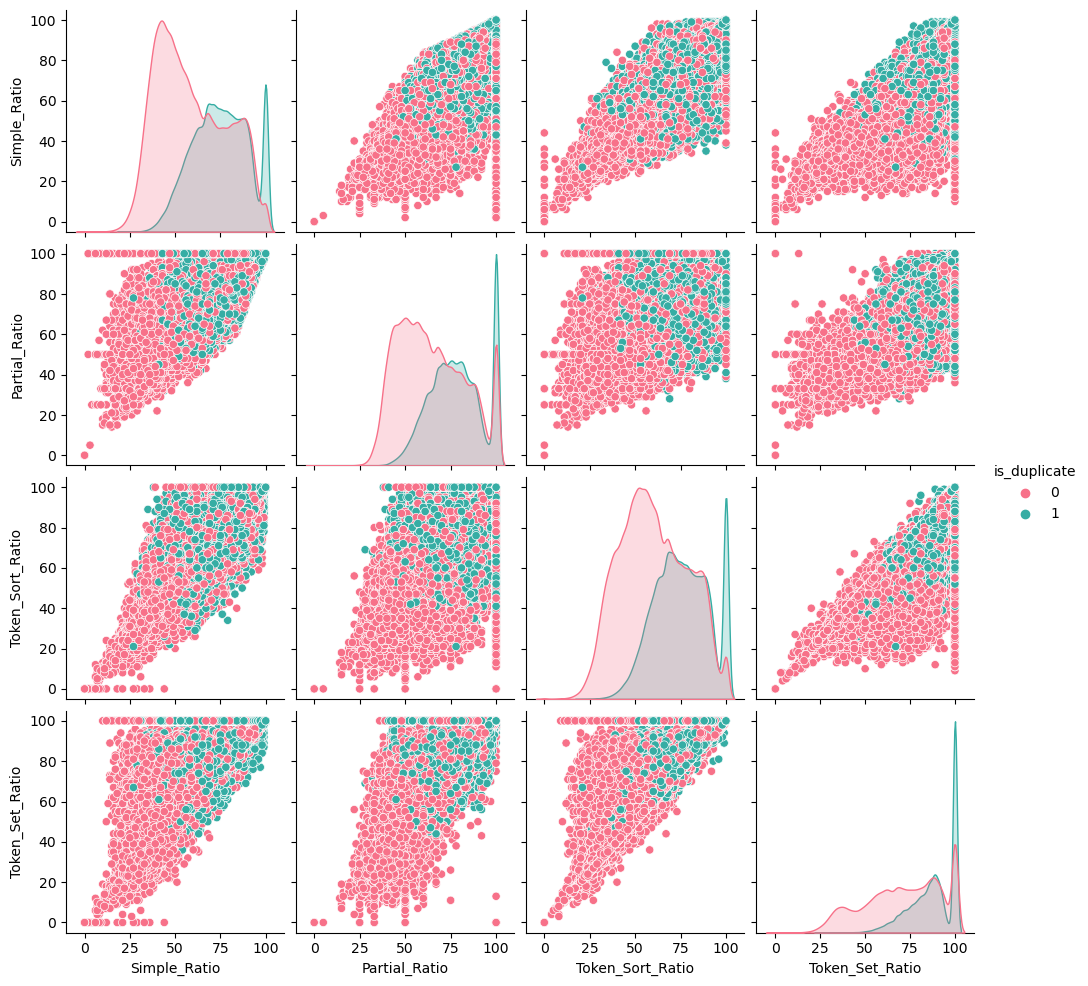

In [78]:
n = df.shape[0]
sns.pairplot(df[['Simple_Ratio', 'Partial_Ratio', 'Token_Sort_Ratio', 'Token_Set_Ratio','is_duplicate']][0:n], hue='is_duplicate', vars=['Simple_Ratio', 'Partial_Ratio', 'Token_Sort_Ratio', 'Token_Set_Ratio'], palette="husl")
plt.show()

/home/cdac/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/cdac/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


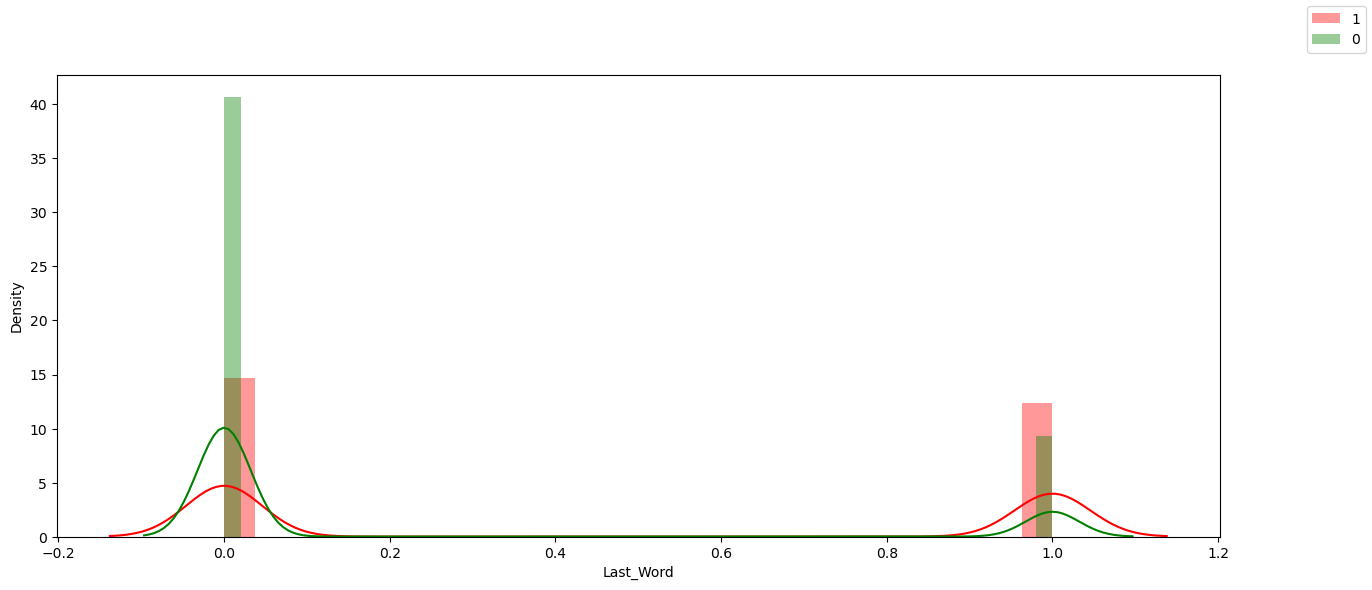

In [80]:
# Distribution of the Last_Word
plt.figure(figsize=(15, 6))

sns.distplot(df[df['is_duplicate'] == 1.0]['Last_Word'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['Last_Word'][0:] , label = "0" , color = 'green' )
plt.figlegend()

plt.show()

/home/cdac/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/cdac/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


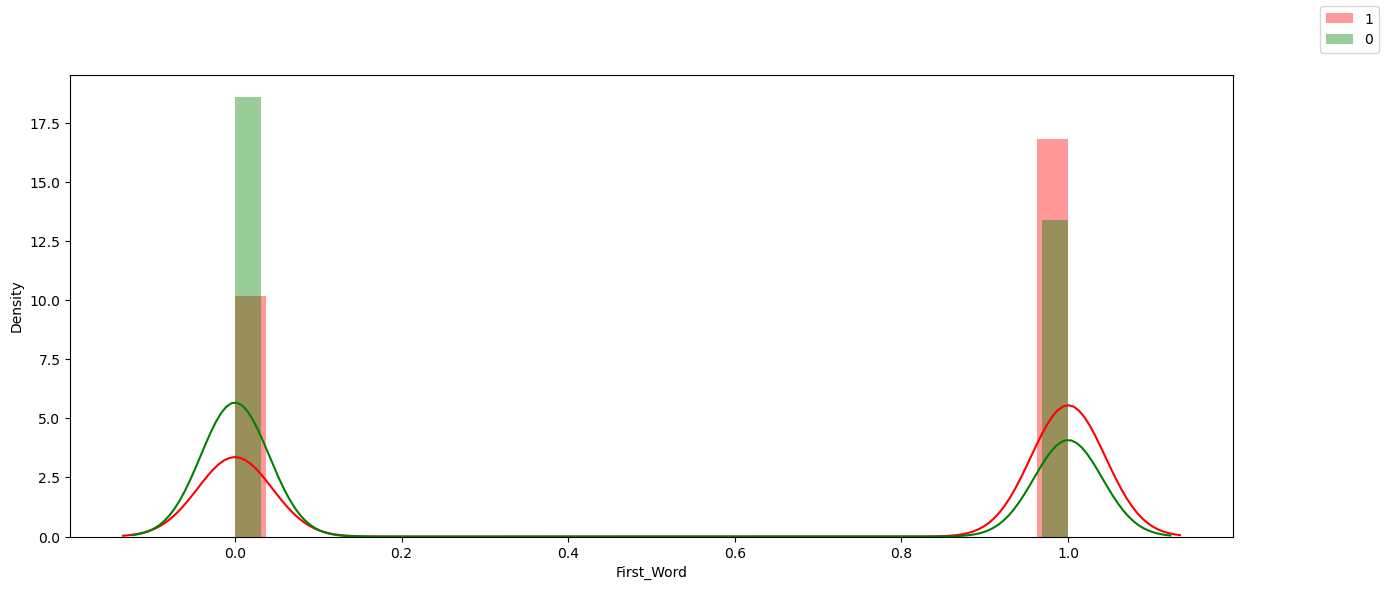

In [81]:
# Distribution of the First_Word
plt.figure(figsize=(15, 6))

sns.distplot(df[df['is_duplicate'] == 1.0]['First_Word'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['First_Word'][0:] , label = "0" , color = 'green' )
plt.figlegend()

plt.show()

/home/cdac/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/cdac/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


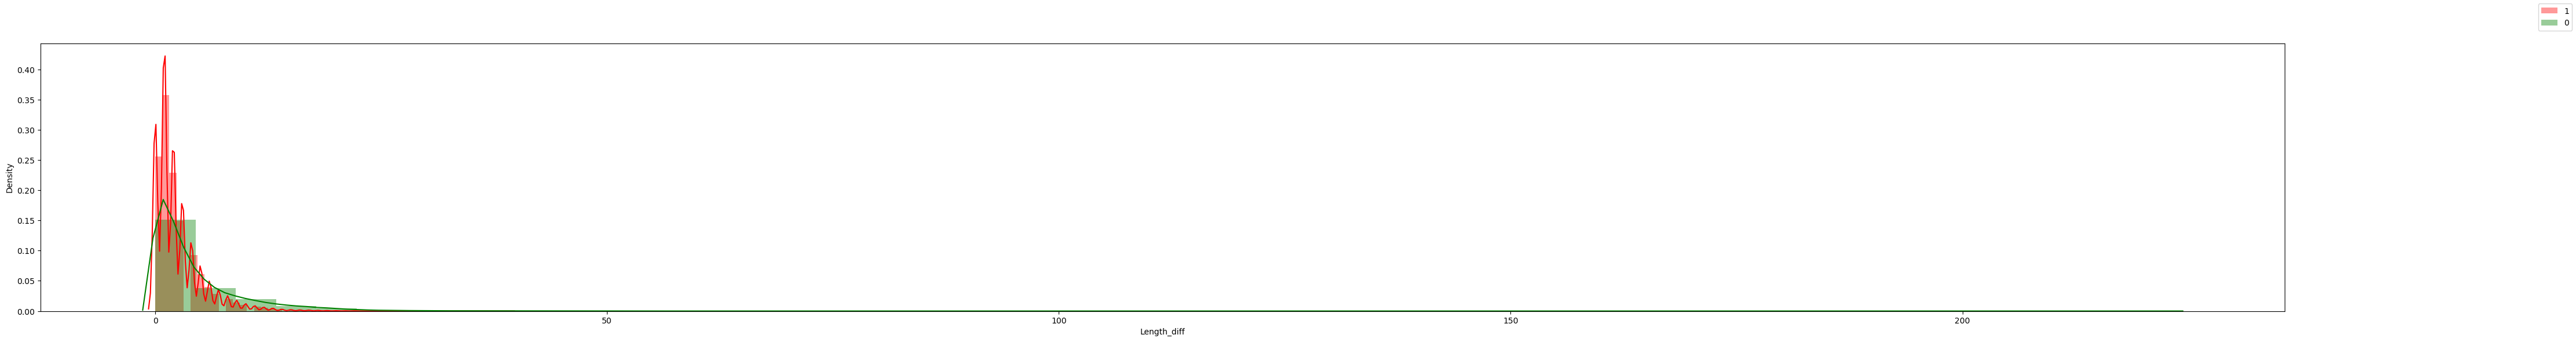

In [85]:
# Distribution of the Length_diff
plt.figure(figsize=(50, 6))

sns.distplot(df[df['is_duplicate'] == 1.0]['Length_diff'][0:] , label = "1", color = 'red')
sns.distplot(df[df['is_duplicate'] == 0.0]['Length_diff'][0:] , label = "0" , color = 'green' )
plt.figlegend()

plt.show()

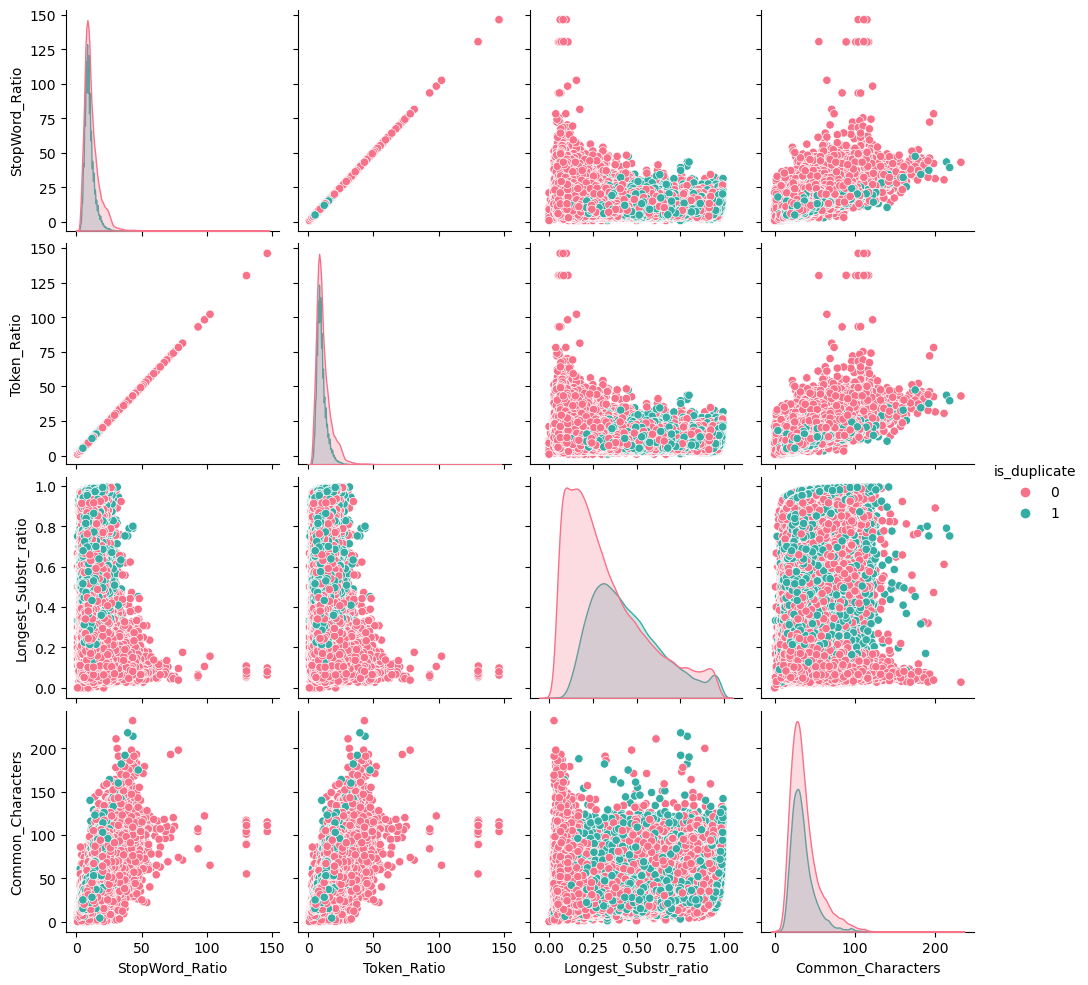

In [86]:
n = df.shape[0]
sns.pairplot(df[['StopWord_Ratio', 'Token_Ratio', 'Longest_Substr_ratio', 'Common_Characters','is_duplicate']][0:n], hue='is_duplicate', vars=['StopWord_Ratio', 'Token_Ratio', 'Longest_Substr_ratio', 'Common_Characters'], palette="husl")
plt.show()

### 'Stopword_ratio','token_ratio','longest_substring_ratio','common_characters','Length_diff'
### All are showing overlapped graphs, Hence we will remove these features.

In [65]:
df.drop(columns=['StopWord_Ratio', 'Token_Ratio', 'Longest_Substr_ratio', 'Common_Characters'],inplace=True)

In [66]:
df.drop(columns='Length_diff',inplace=True)

In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 398782 to 165218
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                99999 non-null  int64  
 1   qid1              99999 non-null  int64  
 2   qid2              99999 non-null  int64  
 3   question1         99999 non-null  object 
 4   question2         99999 non-null  object 
 5   is_duplicate      99999 non-null  int64  
 6   Q1_Len            99999 non-null  int64  
 7   Q2_Len            99999 non-null  int64  
 8   Q1_Words          99999 non-null  int64  
 9   Q2_Words          99999 non-null  int64  
 10  common_Word       99999 non-null  int64  
 11  Shared_Word       99999 non-null  float64
 12  cleanQ1           99999 non-null  object 
 13  cleanQ2           99999 non-null  object 
 14  Simple_Ratio      99999 non-null  int64  
 15  Partial_Ratio     99999 non-null  int64  
 16  Token_Sort_Ratio  99999 non-null  

### Removing original question

In [68]:
# Deleting question1 from our data frame
del df['question1']

# Deleting question2 from our data frame
del df['question2']

# Printing dataset after deletion

df.head()

,id,qid1,qid2,is_duplicate,Q1_Len,Q2_Len,Q1_Words,Q2_Words,common_Word,Shared_Word,cleanQ1,cleanQ2,Simple_Ratio,Partial_Ratio,Token_Sort_Ratio,Token_Set_Ratio,Last_Word,First_Word
398782,398782,496695,532029,1,76,77,12,12,11,0.458333,what best market autom tool small mid size com...,what best market autom tool small mid size com...,100,100,100,100,1,1
115086,115086,187729,187730,0,49,57,12,15,7,0.304348,poor want invest what,quit poor want rich what,73,82,62,80,1,1
327711,327711,454161,454162,0,105,120,25,17,2,0.058824,india live abroad met guy franc parti want da...,e thapar univers thapar univers institut engin...,24,31,30,31,0,0
367788,367788,498109,491396,0,59,146,12,30,0,0.000000,whi mani peopl u hate southern state,boyfriend doesnt feel guilti when hurt cri wh...,19,42,25,27,0,0
151235,151235,237843,50930,0,35,50,5,9,3,0.230769,consequ bhopal gas tragedi,what reason behind bhopal gas tragedi,71,78,57,82,1,0


In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 404287 entries, 0 to 404289
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   id                404287 non-null  int64  
 1   qid1              404287 non-null  int64  
 2   qid2              404287 non-null  int64  
 3   is_duplicate      404287 non-null  int64  
 4   Q1_Len            404287 non-null  int64  
 5   Q2_Len            404287 non-null  int64  
 6   Q1_Words          404287 non-null  int64  
 7   Q2_Words          404287 non-null  int64  
 8   common_Word       404287 non-null  int64  
 9   Shared_Word       404287 non-null  float64
 10  cleanQ1           404287 non-null  object 
 11  cleanQ2           404287 non-null  object 
 12  Simple_Ratio      404287 non-null  int64  
 13  Partial_Ratio     404287 non-null  int64  
 14  Token_Sort_Ratio  404287 non-null  int64  
 15  Token_Set_Ratio   404287 non-null  int64  
 16  Last_Word         40

In [69]:
#saving our dataframe as csv
df.to_csv('BasicAndAdvancedFeatures_train.csv')

In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99999 entries, 398782 to 165218
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                99999 non-null  int64  
 1   qid1              99999 non-null  int64  
 2   qid2              99999 non-null  int64  
 3   is_duplicate      99999 non-null  int64  
 4   Q1_Len            99999 non-null  int64  
 5   Q2_Len            99999 non-null  int64  
 6   Q1_Words          99999 non-null  int64  
 7   Q2_Words          99999 non-null  int64  
 8   common_Word       99999 non-null  int64  
 9   Shared_Word       99999 non-null  float64
 10  cleanQ1           99999 non-null  object 
 11  cleanQ2           99999 non-null  object 
 12  Simple_Ratio      99999 non-null  int64  
 13  Partial_Ratio     99999 non-null  int64  
 14  Token_Sort_Ratio  99999 non-null  int64  
 15  Token_Set_Ratio   99999 non-null  int64  
 16  Last_Word         99999 non-null  

In [71]:
df.columns

Index(['id', 'qid1', 'qid2', 'is_duplicate', 'Q1_Len', 'Q2_Len', 'Q1_Words',
       'Q2_Words', 'common_Word', 'Shared_Word', 'cleanQ1', 'cleanQ2',
       'Simple_Ratio', 'Partial_Ratio', 'Token_Sort_Ratio', 'Token_Set_Ratio',
       'Last_Word', 'First_Word'],
      dtype='object')

## Featurizing text data

In [72]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [73]:
df_2 = df[['cleanQ1','cleanQ2','is_duplicate']]
df_2['cleanQ1'] = df_2['cleanQ1'].apply(lambda x: str(x))
df_2['cleanQ2'] = df_2['cleanQ2'].apply(lambda x: str(x))
df_2.sample(10)

,cleanQ1,cleanQ2,is_duplicate
118766,what join accentur accept offer letter,reject offer letter accentur accept,1
93414,legit onlin job could home,what legit onlin job work home,1
189802,salari statement like 10170 18500rs karnatak...,what differ life ca charter account india vs...,0
110024,how trust univers,how trust work,0
39748,who think win trump hillari,who win trump clinton,1
82914,whi cadburi stop product byte,how take agenc cadburi,0
300572,what best way sustain motiv,what way sustain motiv,1
92793,run bbs realli excit back day,anyon tri use relianc jio sim nexus 9 tablet,0
397508,how get start codeforc,how start use codeforc,1
299827,how build profil indian b school,how improv profil top indian b school,1


In [74]:
# merging questions of both Q1 and Q2 to a single list 
# In which first 404287 index will be of question 1 and then rest of question 2

questions = list(df['cleanQ1']) + list(df['cleanQ2'])  

# len(questions): 808574

#  Convert a collection of raw documents to a matrix of TF-IDF features
tfidf = TfidfVectorizer( max_features=1000,ngram_range=(1,3) ) 

# Converting out text to a matrix of TF-IDF features
#tfidf.fit_transform(questions)  

In [75]:
tfidf_1 = tfidf.fit_transform(questions)

In [76]:
q1_arry,q2_arry = np.vsplit(tfidf_1.toarray(),2)

In [77]:
q1_arry.shape

(99999, 1000)

In [78]:
q1_df1 = pd.DataFrame(q1_arry, index = df_2.index)
q2_df2 = pd.DataFrame(q2_arry, index = df_2.index) #same indexing(row index given to both dataframe)
q12_df3 = pd.concat([q1_df1, q2_df2], axis=1)
q12_df3

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
398782,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
115086,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
327711,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
367788,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
151235,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147622,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
353951,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
251765,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150383,0.0,0.374646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [79]:
df_allFeatures = df.drop(columns=['id', 'qid1', 'qid2', 'is_duplicate','cleanQ1', 'cleanQ2'])

In [80]:
df_allFeatures

,Q1_Len,Q2_Len,Q1_Words,Q2_Words,common_Word,Shared_Word,Simple_Ratio,Partial_Ratio,Token_Sort_Ratio,Token_Set_Ratio,Last_Word,First_Word
398782,76,77,12,12,11,0.458333,100,100,100,100,1,1
115086,49,57,12,15,7,0.304348,73,82,62,80,1,1
327711,105,120,25,17,2,0.058824,24,31,30,31,0,0
367788,59,146,12,30,0,0.000000,19,42,25,27,0,0
151235,35,50,5,9,3,0.230769,71,78,57,82,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
147622,23,61,6,13,5,0.263158,54,79,53,100,1,1
353951,58,52,10,10,5,0.250000,81,82,77,84,0,0
251765,36,49,6,9,2,0.133333,60,68,55,67,0,0
150383,89,95,17,17,2,0.058824,45,52,61,65,0,0


In [81]:
final_df = pd.concat([q12_df3,df_allFeatures],axis=1)

In [82]:
final_df

,0,1,2,3,4,5,6,7,8,9,...,Q1_Words,Q2_Words,common_Word,Shared_Word,Simple_Ratio,Partial_Ratio,Token_Sort_Ratio,Token_Set_Ratio,Last_Word,First_Word
398782,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12,12,11,0.458333,100,100,100,100,1,1
115086,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12,15,7,0.304348,73,82,62,80,1,1
327711,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25,17,2,0.058824,24,31,30,31,0,0
367788,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12,30,0,0.000000,19,42,25,27,0,0
151235,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,9,3,0.230769,71,78,57,82,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147622,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6,13,5,0.263158,54,79,53,100,1,1
353951,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,10,5,0.250000,81,82,77,84,0,0
251765,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6,9,2,0.133333,60,68,55,67,0,0
150383,0.0,0.374646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17,17,2,0.058824,45,52,61,65,0,0


In [83]:
final_df = pd.concat([final_df,df['is_duplicate']],axis=1)

In [84]:
final_df

,0,1,2,3,4,5,6,7,8,9,...,Q2_Words,common_Word,Shared_Word,Simple_Ratio,Partial_Ratio,Token_Sort_Ratio,Token_Set_Ratio,Last_Word,First_Word,is_duplicate
398782,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12,11,0.458333,100,100,100,100,1,1,1
115086,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,15,7,0.304348,73,82,62,80,1,1,0
327711,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17,2,0.058824,24,31,30,31,0,0,0
367788,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,30,0,0.000000,19,42,25,27,0,0,0
151235,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9,3,0.230769,71,78,57,82,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147622,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,13,5,0.263158,54,79,53,100,1,1,1
353951,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,5,0.250000,81,82,77,84,0,0,0
251765,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,9,2,0.133333,60,68,55,67,0,0,0
150383,0.0,0.374646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17,2,0.058824,45,52,61,65,0,0,0


# Modeling

In [85]:
from sklearn.model_selection import train_test_split

In [91]:
X=final_df.iloc[:,0:-1]

In [94]:
X

,0,1,2,3,4,5,6,7,8,9,...,Q1_Words,Q2_Words,common_Word,Shared_Word,Simple_Ratio,Partial_Ratio,Token_Sort_Ratio,Token_Set_Ratio,Last_Word,First_Word
398782,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12,12,11,0.458333,100,100,100,100,1,1
115086,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12,15,7,0.304348,73,82,62,80,1,1
327711,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,25,17,2,0.058824,24,31,30,31,0,0
367788,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,12,30,0,0.000000,19,42,25,27,0,0
151235,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,5,9,3,0.230769,71,78,57,82,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147622,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6,13,5,0.263158,54,79,53,100,1,1
353951,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,10,10,5,0.250000,81,82,77,84,0,0
251765,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6,9,2,0.133333,60,68,55,67,0,0
150383,0.0,0.374646,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,17,17,2,0.058824,45,52,61,65,0,0


In [97]:
Y=final_df.iloc[:,-1]

In [98]:
Y

398782    1
115086    0
327711    0
367788    0
151235    0
         ..
147622    1
353951    0
251765    0
150383    0
165218    0
Name: is_duplicate, Length: 99999, dtype: int64

In [99]:
X_train,X_test, y_train, y_test = train_test_split(X.values,Y.values, test_size=0.3,random_state=None)

## RandomForestClassifier

In [100]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [101]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

0.8066333333333333

## XGBClassifier

In [102]:
from xgboost import XGBClassifier

In [103]:
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [111]:
y_pred1 = xgb.predict(X_test)

In [112]:
accuracy_score(y_test,y_pred1)

0.797

## Multinomial NaiveBias

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [120]:
mnb_model = MultinomialNB()
mnb_model.fit(X_train,y_train)
y_pred2 = mnb_model.predict(X_test)

In [122]:
mnb_model.score(X_test,y_test)

0.654

## DecisionTreeClassifier

In [108]:
from sklearn.tree import DecisionTreeClassifier

In [109]:
decisionTreeClassifier = DecisionTreeClassifier()
decisionTreeClassifier.fit(X_train,y_train)
y_pred1 = decisionTreeClassifier.predict(X_test)

In [110]:
decisionTreeClassifier.score(X_test,y_test)

0.7410666666666667

In [118]:
from sklearn.model_selection import GridSearchCV

In [119]:
param_grid = {'bootstrap':[True],
             'max_depth': [10,50,100],
             'max_features':[0.5,0.75,1.0],
             'n_estimators':[10,60,150],
             'max_samples': [0.5,0.75,1.0]}

In [121]:
rf1 = RandomForestClassifier()
rf_grid = GridSearchCV(estimator = rf1,
                      param_grid = param_grid,
                      cv = 5,
                      verbose = 2,
                      n_jobs = -1)

In [122]:
rf_grid.fit(X_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 50, 100],
                         'max_features': [0.5, 0.75, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [10, 60, 150]},
             verbose=2)

In [123]:
rf_grid.best_score_

1.0

In [76]:
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
#df=pd.read_csv('./BasicAndAdvancedFeatures_train.csv')

In [27]:
df

,id,qid1,qid2,is_duplicate,cleanQ1,cleanQ2
402502,402502,122648,535990,0,g base real event,enough base real event
187257,187257,285418,285419,1,how movi like happi new year earn 300 crore,how senseless movi like dilwal happi new year ...
29381,29381,54364,54365,0,what best way tell crush like,how tell girl like
24194,24194,45236,45237,0,roll fair six side die fair four side die wha...,roll fair six side die fair four side die wha...
291941,291941,413461,413462,0,anyon give list scam congress govern india app...,how get total polic station list india
...,...,...,...,...,...,...
287420,287420,10562,4507,1,how lose post marriag weight,how effici lose weight
285483,285483,1812,3478,1,whi tata son replac cyrus mistri ratan tata,what reason behind remov cyrus p mistri posit...
393478,393478,253662,68251,0,who becom next presid india whi,who think best choic india next presid pranab ...
295113,295113,417110,417111,0,how compress bioga lpg cylind,what bioga lpg advantag disadvantag


In [31]:
df1=df[['cleanQ1','cleanQ2','is_duplicate']]

In [32]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 402502 to 281734
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   cleanQ1       50000 non-null  object
 1   cleanQ2       50000 non-null  object
 2   is_duplicate  50000 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 1.5+ MB


In [33]:
df1['cleanQ1'] = df1['cleanQ1'].apply(lambda x: str(x))
df1['cleanQ2'] = df1['cleanQ2'].apply(lambda x: str(x))
df1.head()

/tmp/ipykernel_29346/3640357311.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cleanQ1'] = df1['cleanQ1'].apply(lambda x: str(x))
/tmp/ipykernel_29346/3640357311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['cleanQ2'] = df1['cleanQ2'].apply(lambda x: str(x))


,cleanQ1,cleanQ2,is_duplicate
402502,g base real event,enough base real event,0
187257,how movi like happi new year earn 300 crore,how senseless movi like dilwal happi new year ...,1
29381,what best way tell crush like,how tell girl like,0
24194,roll fair six side die fair four side die wha...,roll fair six side die fair four side die wha...,0
291941,anyon give list scam congress govern india app...,how get total polic station list india,0


In [34]:
# merging questions of both Q1 and Q2 to a single list.
questions = list(df1['cleanQ1']) + list(df1['cleanQ2'])

In [36]:
from gensim.models import Word2Vec

# tokenize the questions into lists of words
tokenized_questions = [question.split() for question in questions]

# train a Word2Vec model on the tokenized questions
model = Word2Vec(tokenized_questions, window=5, min_count=1, workers=4)

In [43]:
model.vector

AttributeError: 'Word2Vec' object has no attribute 'vector'

In [42]:
embedding_vector = model.wv['what']


(100,)

In [ ]:
model.

In [44]:
# convert each question to a Word2Vec vector
def question_to_vector(question, model):
    words = question.split()
    vector = np.zeros((model.vector_size,))
    n_words = 0
    for word in words:
        if word in model.wv:
            vector += model.wv[word]
            n_words += 1
    if n_words > 0:
        vector /= n_words
    return vector

In [47]:
# convert each question to a Word2Vec vector
df1['vector_q1'] = [question_to_vector(question, model) for question in df1['cleanQ1']]
df1['vector_q2'] = [question_to_vector(question, model) for question in df1['cleanQ2']]

/tmp/ipykernel_29346/2908550273.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['vector_q1'] = [question_to_vector(question, model) for question in df1['cleanQ1']]
/tmp/ipykernel_29346/2908550273.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['vector_q2'] = [question_to_vector(question, model) for question in df1['cleanQ2']]


In [48]:
df1

,cleanQ1,cleanQ2,is_duplicate,vector_q1,vector_q2
402502,g base real event,enough base real event,0,"[0.17961144354194403, 0.4535125195980072, 0.26...","[0.3232931988313794, 0.43837815150618553, 0.23..."
187257,how movi like happi new year earn 300 crore,how senseless movi like dilwal happi new year ...,1,"[-0.4489250605305036, 0.2436261075652308, -0.0...","[-0.24650531821848395, 0.25403424001370484, -0..."
29381,what best way tell crush like,how tell girl like,0,"[-0.5792891979217529, 0.74367813890179, 0.0883...","[-0.7855826318264008, 0.21946597285568714, -0...."
24194,roll fair six side die fair four side die wha...,roll fair six side die fair four side die wha...,0,"[-0.31385592743754387, -0.0921849247533828, 0....","[-0.29437217781586306, -0.07964644893737775, 0..."
291941,anyon give list scam congress govern india app...,how get total polic station list india,0,"[0.25160398371517656, 0.19650248102843762, -0....","[-0.00442934940968241, -0.00048453094703810554..."
...,...,...,...,...,...
287420,how lose post marriag weight,how effici lose weight,1,"[-0.5456165671348572, -0.009311383962631226, -...","[-0.689900953322649, -0.21775916498154402, 0.1..."
285483,whi tata son replac cyrus mistri ratan tata,what reason behind remov cyrus p mistri posit...,1,"[-0.14688590727746487, 0.17235441476805136, -0...","[-0.20854032987898047, 0.30303182249719446, 0...."
393478,who becom next presid india whi,who think best choic india next presid pranab ...,0,"[0.4473954758917292, 0.4757305880387624, -0.36...","[-0.1070808816390733, 0.5502261670513285, -0.1..."
295113,how compress bioga lpg cylind,what bioga lpg advantag disadvantag,0,"[-0.027293694019317628, -0.025716306641697884,...","[-0.11313427239656448, 0.3291289534419775, 0.2..."


In [94]:
 #Convert a collection of raw documents to a matrix of TF-IDF features
tfidf = TfidfVectorizer()

# Converting out text to a matrix of TF-IDF features
tfidf.fit_transform(questions)

<100000x24400 sparse matrix of type '<class 'numpy.float64'>'
	with 626503 stored elements in Compressed Sparse Row format>

In [95]:
tfidf.get_feature_names()

/home/cdac/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['00',
 '000',
 '002',
 '0021',
 '007',
 '008',
 '00am',
 '00k',
 '00s',
 '00v',
 '01',
 '012',
 '018v4',
 '01st',
 '02',
 '02038',
 '022',
 '03',
 '035tx',
 '038',
 '04',
 '04009',
 '05',
 '05_mar',
 '06',
 '066',
 '0665745511651039',
 '079tx',
 '08',
 '086',
 '09',
 '0at',
 '0km',
 '0m',
 '0s',
 '0v',
 '0x0020',
 '0x80072f78',
 '0x80073cf0',
 '0x800f081f',
 '0xc0k225',
 '10',
 '100',
 '100ah',
 '100g',
 '100k',
 '100kb',
 '100kk',
 '100m',
 '100mbps',
 '100mg',
 '100rs',
 '100s',
 '100sft',
 '101',
 '1013',
 '102',
 '1023',
 '1024',
 '103',
 '103lbs',
 '104',
 '10400',
 '105',
 '1053',
 '1055',
 '105mm',
 '106',
 '1065',
 '1066',
 '107',
 '108',
 '1080',
 '1080p',
 '109',
 '1099',
 '10am',
 '10cgpa',
 '10cm',
 '10g',
 '10k',
 '10kg',
 '10kgs',
 '10kinr',
 '10l',
 '10lac',
 '10m',
 '10mbps',
 '10mg',
 '10min',
 '10s',
 '10sec',
 '10th',
 '10us',
 '10v',
 '10x',
 '11',
 '110',
 '1100',
 '110k',
 '110lbs',
 '110v',
 '111',
 '11110',
 '1112',
 '112',
 '113',
 '11301',
 '114',
 '115',
 '1

In [98]:
# mapping our feature_names with threre resptive tf-idf score  ( dict key:word and value:tf-idf score )
word2tfidf = dict(zip(tfidf.get_feature_names(), tfidf.idf_))

In [99]:
# Plotting Key Value Pair
wrd=list(word2tfidf.keys())[::-1][:]   # finding keys of dict and then reversing them to get last 10 keys
for i in wrd:
    print(i,word2tfidf[i])

한글 11.819788284360284
친구해도 11.819788284360284
슬마 11.819788284360284
될까요 11.819788284360284
됐어요 11.819788284360284
齐家 11.819788284360284
鹵水 11.819788284360284
隔壁老王 11.819788284360284
陰陽師 11.819788284360284
這是什麽 11.819788284360284
自欺欺人 11.819788284360284
精神赵家人 11.819788284360284
粘人 11.819788284360284
窩艾尼 11.819788284360284
礼义廉耻 11.819788284360284
白左 11.819788284360284
用中文的話 11.819788284360284
烤鸭 11.414323176252118
漢字 11.819788284360284
治国 11.819788284360284
气质 11.819788284360284
步步惊心 11.819788284360284
横向卷轴rpg游戏 11.414323176252118
核型多角体病毒 11.819788284360284
杨雅静 11.819788284360284
整序变量 11.819788284360284
放心 11.819788284360284
形から入る 11.819788284360284
弱虫僕と君と花 11.414323176252118
平天下 11.819788284360284
封建成功 11.819788284360284
存在即是合理的 11.819788284360284
外国人 11.819788284360284
分久必合合久必分 11.819788284360284
内脏 11.414323176252118
傻逼 11.819788284360284
修身 11.819788284360284
乐赋唱随 11.819788284360284
不好意思 11.126641103800338
まな 11.819788284360284
なんだよ 11.819788284360284
どのくらい 11.819788284360284
どの 11.8

In [101]:
from tqdm import tqdm

In [109]:
conda install -c conda-forge spacy-model-en_vectors_web_lg

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: \ ^C
- 
Note: you may need to restart the kernel to use updated packages.


In [108]:
#import spacy.cli
conda install -c conda-forge spacy-model-en_vectors_web_lg

SyntaxError: invalid syntax (1056388970.py, line 2)

In [106]:
spacy.cli.download("en_vectors_web_lg")


✘ No compatible package found for 'en_vectors_web_lg' (spaCy
v3.3.1)



SystemExit: 1

/home/cdac/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3465: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [104]:
# en_vectors_web_lg, which includes over 1 million unique vectors.
nlp = spacy.load('en_core_web_sm')

vecs1 = []

for qu1 in tqdm(list(df['cleanQ1'])):
    
    doc1 = nlp(qu1) #creating object of   GLOVE model  so that we can get vetor representation of our words
    
    # Creating a matrix of N x M where N is is number of word is given line and M i.e. 96 which is the vector representaion of 1st word
    mean_vec1 = np.zeros([len(doc1), nlp.vocab.vector_length])
    
    # Looping to all words in the given sentence 
    
    for i,word1 in enumerate(doc1):
        if word1.has_vector:
            
       # word2vec ( Creating Vector Representation of every word ) which is 96
    
        vec1 = word1.vector
        
        # Using try and catch to prefent key error [ For the words that are not there in our word2tfidf dict like empty space ]
        
        try:
            idf = word2tfidf[str(word1)]
        except KeyError:
            idf = 0
        
        # adding up all the words generated in the matrix (word2vec matrix * the word2tfidf Corresponding to that word)
        mean_vec1 += vec1 * idf
    mean_vec1 = mean_vec1.mean(axis=0)
    vecs1.append(mean_vec1)  # Storing the vector representation of every sentence into an array
df1['q1_feats_m'] = list(vecs1)



OSError: [E050] Can't find model 'en_vectors_web_lg'. It doesn't seem to be a Python package or a valid path to a data directory.

In [ ]:
#309656 [math] dikha hai

In [ ]:
new_df.head(10)

In [ ]:
import re
from bs4 import BeautifulSoup

## Text Preprocessing

In [ ]:
def preprocess(q):
    
    q = str(q).lower().strip()
    
    # Replace certain special characters with their string equivalents
    #q = q.replace('@', ' at ')
    #q = q.replace('%', ' percent')
    #q = q.replace('₹', ' rupee ')
    #q = q.replace('€', ' euro ')
    #q = q.replace('$', ' dollar ')
    
    
    #q = q.replace('[math]', '')
    
    
    q = q.replace(',000,000,000 ', 'b ')
    q = q.replace(',000,000 ', 'm ')
    q = q.replace(',000 ', 'k ')
    q = re.sub(r'([0-9]+)000000000', r'\1b', q)
    q = re.sub(r'([0-9]+)000000', r'\1m', q)
    q = re.sub(r'([0-9]+)000', r'\1k', q)
    
    
    # Dictionary of possible contractions
    # source-> https://stackoverflow.com/a/19794953
#     contractions = { 
#     "ain't": "am not",
#     "aren't": "are not",
#     "can't": "can not",
#     "can't've": "can not have",
#     "'cause": "because",
#     "could've": "could have",
#     "couldn't": "could not",
#     "couldn't've": "could not have",
#     "didn't": "did not",
#     "doesn't": "does not",
#     "don't": "do not",
#     "hadn't": "had not",
#     "hadn't've": "had not have",
#     "hasn't": "has not",
#     "haven't": "have not",
#     "he'd": "he would",
#     "he'd've": "he would have",
#     "he'll": "he will",
#     "he'll've": "he will have",
#     "he's": "he is",
#     "how'd": "how did",
#     "how'd'y": "how do you",
#     "how'll": "how will",
#     "how's": "how is",
#     "i'd": "i would",
#     "i'd've": "i would have",
#     "i'll": "i will",
#     "i'll've": "i will have",
#     "i'm": "i am",
#     "i've": "i have",
#     "isn't": "is not",
#     "it'd": "it would",
#     "it'd've": "it would have",
#     "it'll": "it will",
#     "it'll've": "it will have",
#     "it's": "it is",
#     "let's": "let us",
#     "ma'am": "madam",
#     "mayn't": "may not",
#     "might've": "might have",
#     "mightn't": "might not",
#     "mightn't've": "might not have",
#     "must've": "must have",
#     "mustn't": "must not",
#     "mustn't've": "must not have",
#     "needn't": "need not",
#     "needn't've": "need not have",
#     "o'clock": "of the clock",
#     "oughtn't": "ought not",
#     "oughtn't've": "ought not have",
#     "shan't": "shall not",
#     "sha'n't": "shall not",
#     "shan't've": "shall not have",
#     "she'd": "she would",
#     "she'd've": "she would have",
#     "she'll": "she will",
#     "she'll've": "she will have",
#     "she's": "she is",
#     "should've": "should have",
#     "shouldn't": "should not",
#     "shouldn't've": "should not have",
#     "so've": "so have",
#     "so's": "so as",
#     "that'd": "that would",
#     "that'd've": "that would have",
#     "that's": "that is",
#     "there'd": "there would",
#     "there'd've": "there would have",
#     "there's": "there is",
#     "they'd": "they would",
#     "they'd've": "they would have",
#     "they'll": "they will",
#     "they'll've": "they will have",
#     "they're": "they are",
#     "they've": "they have",
#     "to've": "to have",
#     "wasn't": "was not",
#     "we'd": "we would",
#     "we'd've": "we would have",
#     "we'll": "we will",
#     "we'll've": "we will have",
#     "we're": "we are",
#     "we've": "we have",
#     "weren't": "were not",
#     "what'll": "what will",
#     "what'll've": "what will have",
#     "what're": "what are",
#     "what's": "what is",
#     "what've": "what have",
#     "when's": "when is",
#     "when've": "when have",
#     "where'd": "where did",
#     "where's": "where is",
#     "where've": "where have",
#     "who'll": "who will",
#     "who'll've": "who will have",
#     "who's": "who is",
#     "who've": "who have",
#     "why's": "why is",
#     "why've": "why have",
#     "will've": "will have",
#     "won't": "will not",
#     "won't've": "will not have",
#     "would've": "would have",
#     "wouldn't": "would not",
#     "wouldn't've": "would not have",
#     "y'all": "you all",
#     "y'all'd": "you all would",
#     "y'all'd've": "you all would have",
#     "y'all're": "you all are",
#     "y'all've": "you all have",
#     "you'd": "you would",
#     "you'd've": "you would have",
#     "you'll": "you will",
#     "you'll've": "you will have",
#     "you're": "you are",
#     "you've": "you have",
#     "'ve": " have",
#     "n't": " not",
#     "'re": " are",
#     "'ll": " will",
#     "bcoz":"because"
#     }
    
    
    
    #     decontracted_ques = []
    #     for word in q.split():
    #         if word in contractions:
    #             word = contractions[word]
    
    #         decontracted_ques.append(word)
    
    
    #reforming the string with listItems seperated with whitespaces
    #q = ' '.join(decontracted_ques)

    
    # Removing HTML tags
    #q = BeautifulSoup(q)
    #q = q.get_text()
    
    #Removing punctuations
    pattern = re.compile('\W')
    q = re.sub(pattern,' ', q).strip()
    
    return q

In [ ]:
preprocess("It happed all? bcoz of you<p>aja,aja,aja</p>.")
#preprocess("1000000000")

## Basic FeatureEngineering

In [ ]:
new_df['question1'] = new_df['question1'].apply(preprocess)
new_df['question2'] = new_df['question2'].apply(preprocess)

In [ ]:
new_df

In [ ]:
new_df['q1_len'] = new_df['question1'].str.len()
new_df['q2_len'] = new_df['question2'].str.len()

In [ ]:
new_df['q1_num_words'] = new_df['question1'].apply(lambda row: len(row.split(" ")))
new_df['q2_num_words'] = new_df['question2'].apply(lambda row: len(row.split(" ")))

In [ ]:
def common_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return len(w1 & w2)

In [ ]:
new_df['word_common'] = new_df.apply(common_words, axis=1)

In [ ]:
def total_words(row):
    w1 = set(map(lambda word: word.lower().strip(), row['question1'].split(" ")))
    w2 = set(map(lambda word: word.lower().strip(), row['question2'].split(" ")))    
    return (len(w1) + len(w2))

In [ ]:
new_df['word_total'] = new_df.apply(total_words, axis=1)

In [ ]:
new_df['word_share'] = round(new_df['word_common']/new_df['word_total'],2)

In [ ]:
new_df.isnull().sum()

## Advanced FeatureEngineering

In [ ]:
from nltk.corpus import stopwords

STOP_WORDS = stopwords.words("english")
print(STOP_WORDS)
print(len(STOP_WORDS))

In [ ]:
def fetch_token_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    SAFE_DIV = 0.0001
    
    token_features = [0.0]*8
    
    # Converting the Sentence into Tokens using split() method 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return token_features

    # Get the non-stopwords in Questions
    q1_words = set([word for word in q1_tokens if word not in STOP_WORDS])
    q2_words = set([word for word in q2_tokens if word not in STOP_WORDS])
    
    #Get the stopwords in Questions
    q1_stops = set([word for word in q1_tokens if word in STOP_WORDS])
    q2_stops = set([word for word in q2_tokens if word in STOP_WORDS])
    
    # Get the common non-stopwords from Question pair
    common_word_count = len(q1_words.intersection(q2_words))
    
    # Get the common stopwords from Question pair
    common_stop_count = len(q1_stops.intersection(q2_stops))
    
    # Get the common Tokens from Question pair
    common_token_count = len(set(q1_tokens).intersection(set(q2_tokens)))
    
    
    token_features[0] = common_word_count / (min(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[1] = common_word_count / (max(len(q1_words), len(q2_words)) + SAFE_DIV)
    token_features[2] = common_stop_count / (min(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[3] = common_stop_count / (max(len(q1_stops), len(q2_stops)) + SAFE_DIV)
    token_features[4] = common_token_count / (min(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    token_features[5] = common_token_count / (max(len(q1_tokens), len(q2_tokens)) + SAFE_DIV)
    
    # Last word of both question is same or not
    token_features[6] = int(q1_tokens[-1] == q2_tokens[-1])
    
    # First word of both question is same or not
    token_features[7] = int(q1_tokens[0] == q2_tokens[0])
    
    return token_features



In [ ]:
# applying formulae on each row
token_features = new_df.apply(fetch_token_features, axis=1)

new_df["cwc_min"]       = list(map(lambda x: x[0], token_features))
new_df["cwc_max"]       = list(map(lambda x: x[1], token_features))
new_df["csc_min"]       = list(map(lambda x: x[2], token_features))
new_df["csc_max"]       = list(map(lambda x: x[3], token_features))
new_df["ctc_min"]       = list(map(lambda x: x[4], token_features))
new_df["ctc_max"]       = list(map(lambda x: x[5], token_features))
new_df["last_word_eq"]  = list(map(lambda x: x[6], token_features))
new_df["first_word_eq"] = list(map(lambda x: x[7], token_features))

In [ ]:
new_df.head()

In [ ]:
pip install distance

In [ ]:
import distance

In [ ]:
def fetch_length_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    length_features = [0.0]*3
    
    # Converting the Sentence into Tokens: 
    q1_tokens = q1.split()
    q2_tokens = q2.split()
    
    if len(q1_tokens) == 0 or len(q2_tokens) == 0:
        return length_features
    
    # Absolute length features
    length_features[0] = abs(len(q1_tokens) - len(q2_tokens))
    
    #Average Token Length of both Questions
    length_features[1] = (len(q1_tokens) + len(q2_tokens))/2
    
    strs = list(distance.lcsubstrings(q1, q2))
    length_features[2] = len(strs[0]) / (min(len(q1), len(q2)) + 1)
    
    return length_features

In [ ]:
#Applying length_features to new_df 
length_features = new_df.apply(fetch_length_features, axis=1)

new_df['abs_len_diff'] = list(map(lambda x: x[0], length_features))
new_df['mean_len'] = list(map(lambda x: x[1], length_features))
new_df['longest_substr_ratio'] = list(map(lambda x: x[2], length_features))

In [ ]:
new_df.head()

In [ ]:
pip install fuzzywuzzy

In [ ]:
pip install python-Levenshtein

In [ ]:
from fuzzywuzzy import fuzz

In [ ]:
def fetch_fuzzy_features(row):
    
    q1 = row['question1']
    q2 = row['question2']
    
    fuzzy_features = [0.0]*4
    
    # fuzz_ratio
    fuzzy_features[0] = fuzz.QRatio(q1, q2)

    # fuzz_partial_ratio
    fuzzy_features[1] = fuzz.partial_ratio(q1, q2)

    # token_sort_ratio
    fuzzy_features[2] = fuzz.token_sort_ratio(q1, q2)

    # token_set_ratio
    fuzzy_features[3] = fuzz.token_set_ratio(q1, q2)

    return fuzzy_features

In [ ]:
# Creating new feature columns for fuzzy features
fuzzy_features = new_df.apply(fetch_fuzzy_features, axis=1)

new_df['fuzz_ratio'] = list(map(lambda x: x[0], fuzzy_features))
new_df['fuzz_partial_ratio'] = list(map(lambda x: x[1], fuzzy_features))
new_df['token_sort_ratio'] = list(map(lambda x: x[2], fuzzy_features))
new_df['token_set_ratio'] = list(map(lambda x: x[3], fuzzy_features))

In [ ]:
new_df.head()

# Feature Visualization

In [ ]:
import seaborn

In [ ]:
seaborn.pairplot(new_df[['ctc_min', 'cwc_min', 'csc_min', 'is_duplicate']],hue='is_duplicate')

In [ ]:
sns.pairplot(new_df[['last_word_eq', 'first_word_eq', 'is_duplicate']],hue='is_duplicate')

In [ ]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

In [ ]:
sns.pairplot(new_df[['mean_len', 'abs_len_diff','longest_substr_ratio', 'is_duplicate']],hue='is_duplicate')

In [ ]:
sns.pairplot(new_df[['fuzz_ratio', 'fuzz_partial_ratio','token_sort_ratio','token_set_ratio', 'is_duplicate']],hue='is_duplicate')

# Feature Transformation

In [ ]:
new_df.shape

In [ ]:
ques_df = new_df[['question1','question2']]

In [ ]:
ques_df.head()

In [ ]:
ques_df.shape

In [ ]:
questions = list(ques_df['question1']) + list(ques_df['question2'])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
tfidf = TfidfVectorizer(lowercase=False,max_features=5000)
tfidf_fitted = tfidf.fit_transform(questions)

In [ ]:
tfidf_fitted

In [ ]:
tfidf.get_feature_names()

In [ ]:
q1_arry,q2_arry = np.vsplit(tfidf_fitted.toarray(),2)

In [ ]:
q1_arry.shape

In [ ]:
temp_df1 = pd.DataFrame(q1_arry, index=ques_df.index)
temp_df2 = pd.DataFrame(q2_arry, index=ques_df.index) #same indexing(row index given to both dataframe)
temp_df3 = pd.concat([temp_df1, temp_df2], axis=1)
temp_df3

In [ ]:
temp_df3.shape

In [ ]:
new_df.head()

In [ ]:
final_df = new_df.drop(columns=['id','qid1','qid2','question1','question2'])

In [ ]:
final_df.head()

In [ ]:
final_df = pd.concat([final_df, temp_df3], axis=1)

In [ ]:
final_df.head()

In [ ]:
final_df.shape

In [ ]:
X = final_df.iloc[:,1:]

In [ ]:
Y = final_df.iloc[:,0]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X.values,Y.values,test_size=0.2,random_state=2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
accuracy_score(y_test,y_pred)

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_grid = {'bootstrap':[True],
             'max_depth': [8,9,10],
             'max_features':[0.5,0.75,1.0],
             'n_estimators':[10,20,50],
             'max_samples': [0.5,0.75,1.0]}

In [ ]:
rf1 = RandomForestClassifier()
rf_grid = GridSearchCV(estimator = rf1,
                      param_grid = param_grid,
                      cv = 5,
                      verbose = 2,
                      n_jobs = -1)

In [ ]:
rf_grid.fit(X_train,y_train)

In [ ]:
rf_grid.best_params_

In [ ]:
rf_grid.best_score_

In [ ]:
from sklearn.tree import DecisionTreeClassifier
decisionTreeClassifier = DecisionTreeClassifier()
decisionTreeClassifier.fit(X_train,y_train)
decisionTreeClassifier.score(X_test,y_test)

In [ ]:
decisionTreeClassifier.score(X_test,y_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb_model = MultinomialNB()
mnb_model.fit(X_train,y_train)
mnb_model.score(X_test,y_test)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
knn_model = KNeighborsClassifier()
knn_model.fit(X_train,y_train)

In [ ]:
knn_model.score(X_test,y_test)

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model = SVC()
svc_model.fit(X_train,y_train)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV

In [ ]:
lrcv_model = LogisticRegressionCV()
lrcv_model.fit(X_test,y_test)

In [ ]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)

In [ ]:
y_pred1 = xgb.predict(X_test)
accuracy_score(y_test,y_pred1)